In [4]:
pip install nbconvert[webpdf]

zsh:1: no matches found: nbconvert[webpdf]
Note: you may need to restart the kernel to use updated packages.


 
 # Linear Regression
 


 ## Libraries

In [1]:
import pandas as pd 
# Used to manipulate and analyze data in tabular format (DataFrames)

import numpy as np
# Provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions

import seaborn as sns
# Built on top of Matplotlib, it provides a high-level interface for drawing attractive statistical graphics

import matplotlib.pyplot as plt
# A plotting library used for creating static, animated, and interactive visualizations in Python

import statsmodels.formula.api as smf
# Provides a formula framework for specifying statistical models in a concise way, similar to R's formula interface

from patsy import dmatrices
# Provides a way to describe statistical models using symbolic formulas, helps handle special characters in column names

import statsmodels.api as sm
# Used for estimating and testing statistical models, and performing statistical tests and data exploration

from sklearn.model_selection import train_test_split
# Used to split arrays or matrices into random train and test subsets for model validation



In [2]:
# Assuming the data is in a CSV file called 'lease_data.csv'
data = pd.read_csv('leases.csv')
data.head()

,Lease Cost ($),Square Feet,Cost per Sq Foot,1/Sq Feet,Parking/SqFt,Age,Parking,Location,Location Dummy,Dummy * 1/SqFt,...,Leaselength,Distance to City (miles),Drive Time to Airport (minutes),Distance to Airport (miles),Occupancy,Num Floors in Bldg,Num Floors in Lease,Sq Ft in Bldg,New Wiring,Lease is Renewable
0,329959,19083,17.290730,0.000052,0.000314,7,6,Suburbs,0,0.000000,...,6,4.90,22.67,12.27,0.85,14,13,23742.84,NO,NO
1,298073,18010,16.550416,0.000056,0.000111,78,2,City,1,0.000056,...,9,0.19,25.36,14.25,0.94,9,3,30229.57,NO,NO
2,2820213,154085,18.302969,0.000006,0.000000,3,0,Suburbs,0,0.000000,...,10,3.86,10.70,10.78,0.85,11,8,43098.76,YES,NO
3,883773,52826,16.729887,0.000019,0.000000,51,0,City,1,0.000019,...,6,1.46,20.49,12.96,0.93,30,7,14394.44,NO,NO
4,359745,22864,15.734124,0.000044,0.000000,15,0,Suburbs,0,0.000000,...,5,3.93,17.16,11.75,0.99,16,14,41446.59,NO,NO


In [3]:
data.columns

Index(['Lease Cost ($)', 'Square Feet', 'Cost per Sq Foot', '1/Sq Feet',
       'Parking/SqFt', 'Age', 'Parking', 'Location', 'Location Dummy',
       'Dummy * 1/SqFt', 'Renovation', 'Leaselength',
       'Distance to City (miles)', 'Drive Time to Airport (minutes)',
       'Distance to Airport (miles)', 'Occupancy', 'Num Floors in Bldg',
       'Num Floors in Lease', 'Sq Ft in Bldg', 'New Wiring',
       'Lease is Renewable'],
      dtype='object')

In [4]:
# 3. (a)
data['reciprocal_sqft'] = data["1/Sq Feet"]
# Perform the regression
model = smf.ols('Q("Cost per Sq Foot") ~ reciprocal_sqft', data=data).fit()

In [5]:
# 3 (b) Print the summary of the regression
summary = model.summary()
print(summary)

                              OLS Regression Results                             
Dep. Variable:     Q("Cost per Sq Foot")   R-squared:                       0.156
Model:                               OLS   Adj. R-squared:                  0.152
Method:                    Least Squares   F-statistic:                     40.92
Date:                   Sat, 01 Jun 2024   Prob (F-statistic):           9.34e-10
Time:                           08:59:18   Log-Likelihood:                -421.69
No. Observations:                    223   AIC:                             847.4
Df Residuals:                        221   BIC:                             854.2
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept   

In [6]:
# Get confidence intervals
conf_intervals = model.conf_int()
print("95% Confidence intervals:\n", conf_intervals)

95% Confidence intervals:
                            0            1
Intercept          16.182590    16.714418
reciprocal_sqft  2643.247765  4997.144796


### 95% Confidence Interval for the Fixed Cost
Confidence Interval for Intercept:
Lower Bound: 16.182590
Upper Bound: 16.714418

#### Interpretation:
The fixed cost of the leases, which is the portion of the cost that does not change with the size of the lease, is estimated to be between approximately $16.18  and $16.71 per square foot. This interval means we are 95% confident that the true fixed cost lies within this range.

### 95% Confidence Interval for the Variable Cost
Confidence Interval for reciprocal_sqft:
Lower Bound: 2643.247765
Upper Bound: 4997.144796

#### Interpretation:
The variable cost of the leases, which is the cost determined by the number of square feet, is estimated to be between approximately $2643.25 and $4997.14. This wide interval suggests that for each unit increase in the reciprocal of the number of square feet, the cost per square foot could vary significantly within this range. We are 95% confident that the true variable cost lies within this range.

In [7]:
# Calculate the reciprocal of 15,000 square feet
reciprocal_15000_sqft = 1 / 15000

# Create a DataFrame for the prediction
predict_data = pd.DataFrame({'reciprocal_sqft': [reciprocal_15000_sqft]})

# Predict the cost per square foot
predicted_cost_per_sqft = model.predict(predict_data)

# Get the prediction interval
predictions = model.get_prediction(predict_data)
prediction_summary = predictions.summary_frame(alpha=0.05)

# Extract the mean prediction and the interval
mean_prediction = prediction_summary['mean'][0]
lower_bound = prediction_summary['obs_ci_lower'][0]
upper_bound = prediction_summary['obs_ci_upper'][0]

# Print the results
print(f"Predicted cost per square foot for a 15,000 sq ft lease: {mean_prediction:.2f}")
print(f"95% prediction interval for the cost per square foot: ({lower_bound:.2f}, {upper_bound:.2f})")


Predicted cost per square foot for a 15,000 sq ft lease: 16.70
95% prediction interval for the cost per square foot: (13.52, 19.89)


### Predicted Cost per Square Foot for a 15,000 sq ft Lease
Predicted Cost per Square Foot: 16.70
95% Prediction Interval: (13.52, 19.89)

#### Interpretation:
For a lease with 15,000 square feet in Lagos, the predicted cost per square foot is approximately $16.70. The 95% prediction interval ranges from $13.52 to $19.89 per square foot. This interval accounts for the variability and uncertainty in the prediction, providing a reasonable range for the cost per square foot. This information is useful for management to estimate potential leasing costs with a certain degree of confidence.

In [8]:
# Calculate the total cost for 15,000 square feet
total_mean_cost = mean_prediction * 15000
total_lower_bound = lower_bound * 15000
total_upper_bound = upper_bound * 15000

# Print the results
print(f"Predicted total cost for a 15,000 sq ft lease: ${total_mean_cost:.2f}")
print(f"95% prediction interval for the total cost: (${total_lower_bound:.2f}, ${total_upper_bound:.2f})")

Predicted total cost for a 15,000 sq ft lease: $250547.76
95% prediction interval for the total cost: ($202816.27, $298279.25)


#### Interpretation

The predicted total cost for a 15,000 square foot lease is approximately $250,547.76.
The 95% prediction interval for the total cost of the lease is between approximately $202,816.27 and $298,279.25.

This means that based on the model, we are 95% confident that the total cost for a 15,000 square foot lease falls within the range of approximately $202,816.27 to $298,279.25.

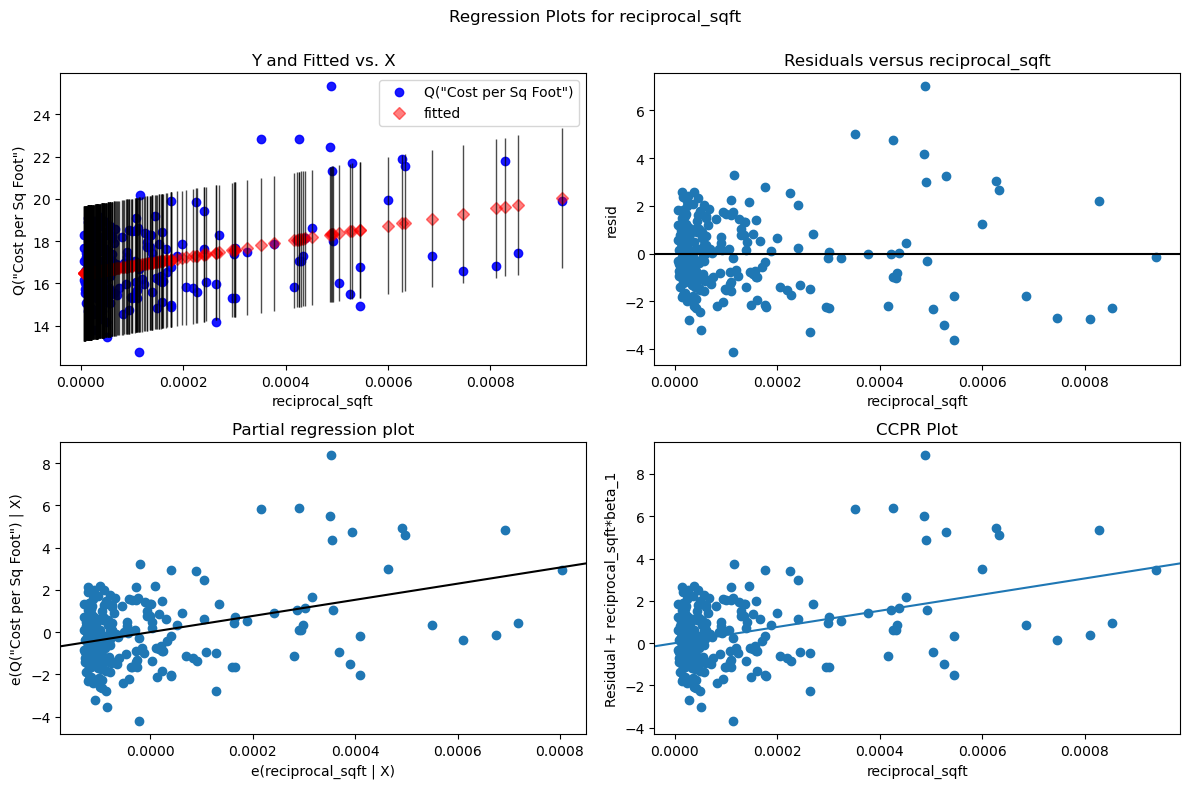

In [11]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Assuming `model` is your fitted OLS model
fig = plt.figure(figsize=(12, 8))
sm.graphics.plot_regress_exog(model, 'reciprocal_sqft', fig=fig)
plt.show()


The model exhibits heteroscedasticity, as indicated by increasing residual variance with the predictor. Residuals are not randomly distributed and show patterns, especially at lower predictor values. The variability in the fitted values versus actual values is significant, with inconsistent fits in some regions. Partial regression and CCPR plots also suggest a weak linear relationship between the variables.

In [37]:
convenience_data = pd.read_csv('convenience.csv')

In [40]:
convenience_data.columns

Index(['Sales (Dollars)', 'Volume (Gallons)', 'Washes', 'DayWeek',
       'Price (cents)', 'Weekend'],
      dtype='object')

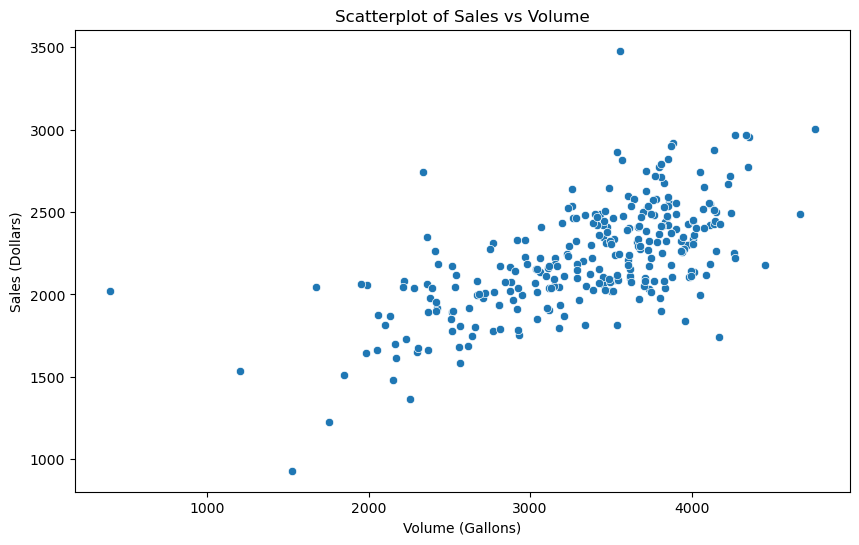

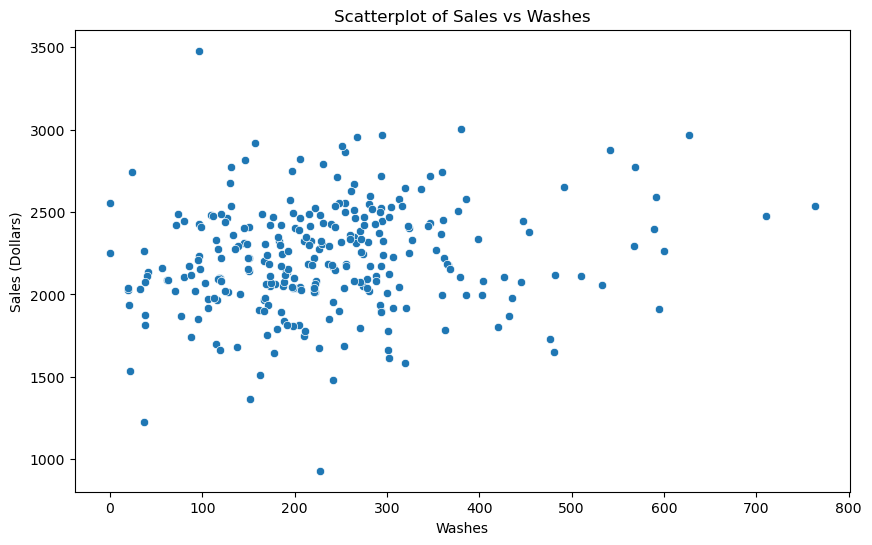

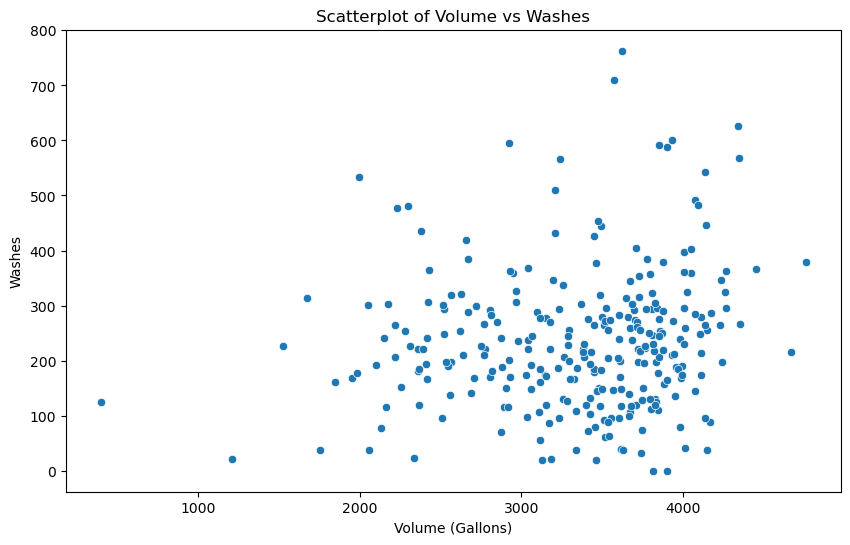

In [41]:
# Scatterplot of Sales vs Volume
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Volume (Gallons)', y='Sales (Dollars)', data=convenience_data)
plt.xlabel('Volume (Gallons)')
plt.ylabel('Sales (Dollars)')
plt.title('Scatterplot of Sales vs Volume')
plt.show()

# Scatterplot of Sales vs Washes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Washes', y='Sales (Dollars)', data=convenience_data)
plt.xlabel('Washes')
plt.ylabel('Sales (Dollars)')
plt.title('Scatterplot of Sales vs Washes')
plt.show()

# Scatterplot of Volume vs Washes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Volume (Gallons)', y='Washes', data=convenience_data)
plt.xlabel('Volume (Gallons)')
plt.ylabel('Washes')
plt.title('Scatterplot of Volume vs Washes')
plt.show()

### Interpretations/Features of the plot

Plot between sales and volume shows a pattern of positive relationship. Salse and Washes shows that on neutral but not complex. The plot between the two predictors show little or no relationship between them.

Yes, the plot between the response and the both predictors show straight line pattern meaning there is a linear trend between the response and the predictors

In [48]:

# Compute the correlation matrix
correlation_matrix = convenience_data[['Sales (Dollars)','Volume (Gallons)','Washes']].corr()

# 4. (d) (i)
# Display the correlation matrix
correlation_matrix

,Sales (Dollars),Volume (Gallons),Washes
Sales (Dollars),1.000000,0.649550,0.170001
Volume (Gallons),0.649550,1.000000,0.124177
Washes,0.170001,0.124177,1.000000


The largest correlation is between Sales(Dollars)  and Volume(Gallons) with a value of 0.649550.

Because the gas is the primary business at the store, it indicates that most of their customers come to the store purposely to purchase gas. Hence the more peopple come to buy gas more the overall sales increase. 

In [50]:
# 4. (e) 


# Fitting multiple regression model
model = smf.ols('Q("Sales (Dollars)") ~ Q("Volume (Gallons)") + Washes', data=convenience_data).fit()

# Summary of the fitted model
print("\nSummary of the fitted model without interaction term:")
print(model.summary())


Summary of the fitted model without interaction term:
                             OLS Regression Results                             
Dep. Variable:     Q("Sales (Dollars)")   R-squared:                       0.430
Model:                              OLS   Adj. R-squared:                  0.426
Method:                   Least Squares   F-statistic:                     105.6
Date:                  Thu, 30 May 2024   Prob (F-statistic):           6.61e-35
Time:                          22:00:15   Log-Likelihood:                -1957.7
No. Observations:                   283   AIC:                             3921.
Df Residuals:                       280   BIC:                             3932.
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------



The R² value is 0.430, which means that approximately 43.0% of the variance in Sales (Dollars) is explained by the predictors Volume (Gallons) and Washes. 

The coefficient for Volume (Gallons) is 0.3150 with a p-value of 0.000, indicating a highly significant positive relationship between Volume (Gallons) and Sales (Dollars).

The coefficient for Washes is 0.2327 with a p-value of 0.047, indicating a significant positive relationship between Washes and Sales (Dollars) at the 5% significance level.

While the R² value of 0.430 suggests a moderate fit, indicating that other factors may also influence Sales (Dollars), the model is statistically significant overall. The significant p-values for both Volume (Gallons) and Washes indicate that these predictors contribute meaningfully to explaining the variance in Sales (Dollars).



Positive Relationship: There is a positive relationship between the number of car washes and convenience store sales. For each additional car wash performed, the sales increase by approximately $0.2327 on average.

Statistical Significance: This effect is statistically significant, meaning it is unlikely to have occurred by random chance.

Confidence Interval: The true effect of each additional car wash on sales is likely between $0.003 and $0.462. This range suggests that while the effect can vary, it is consistently positive and adds to the overall sales of the convenience store.

This interpretation helps to understand the impact of car wash services on sales, providing valuable insights for business decisions, such as promoting car wash services to boost overall sales.


In [52]:
# 4. (h) 

# Fitting multiple regression model with interaction term
model_interaction = smf.ols('Q("Sales (Dollars)") ~ Q("Volume (Gallons)") * Washes', data=convenience_data).fit()

# Summary of the fitted model with interaction term
print("\nSummary of the fitted model with interaction term:")
print(model_interaction.summary())


Summary of the fitted model with interaction term:
                             OLS Regression Results                             
Dep. Variable:     Q("Sales (Dollars)")   R-squared:                       0.439
Model:                              OLS   Adj. R-squared:                  0.433
Method:                   Least Squares   F-statistic:                     72.65
Date:                  Thu, 30 May 2024   Prob (F-statistic):           9.44e-35
Time:                          22:03:32   Log-Likelihood:                -1955.5
No. Observations:                   283   AIC:                             3919.
Df Residuals:                       279   BIC:                             3934.
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [53]:
# Calculate percentiles for Volume (Gallons)
volume_25th = convenience_data["Volume (Gallons)"].quantile(0.25)
volume_50th = convenience_data["Volume (Gallons)"].quantile(0.50)
volume_75th = convenience_data["Volume (Gallons)"].quantile(0.75)

# Effect of Washes at these percentiles
effect_25th = -0.9804 + 0.0004 * volume_25th
effect_50th = -0.9804 + 0.0004 * volume_50th
effect_75th = -0.9804 + 0.0004 * volume_75th

effect_25th, effect_50th, effect_75th

(0.19000000000000006, 0.41079999999999994, 0.5459999999999999)

### Interpretation:

When the volume of gas sold is at the 25th percentile, each additional car wash increases convenience store sales by approximately 0.19 dollars.
When the volume of gas sold is at the 50th percentile, each additional car wash increases convenience store sales by approximately 0.41 dollars.
When the volume of gas sold is at the 75th percentile, each additional car wash increases convenience store sales by approximately 0.55 dollars.

This positive range indicates that car washes contribute to higher sales in the convenience store, and this effect is more pronounced as the volume of gas sold increases. This suggests a significant and positive interaction between the number of car washes and the volume of gas sold in determining sales in the convenience store.

Conclusion:
The inclusion of the interaction term between Volume (Gallons) and Washes in the model highlights the complementary relationship between these two predictors in driving sales at the convenience store. As the volume of gas sold increases, the positive impact of car washes on sales also increases, reinforcing the value of combined services offered at the gas station.

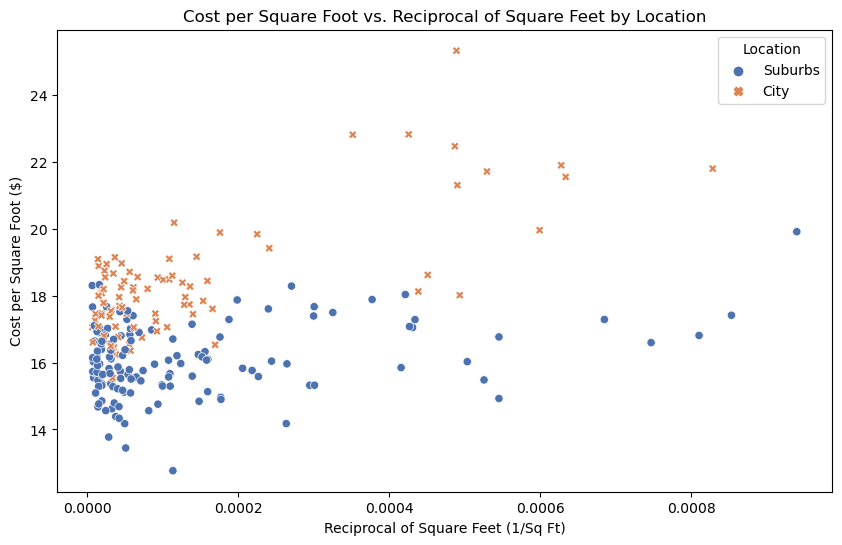

In [55]:
# 5. (a)
# Create the scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='1/Sq Feet', y='Cost per Sq Foot', hue='Location', style='Location', palette='deep')

# Add labels and title
plt.xlabel('Reciprocal of Square Feet (1/Sq Ft)')
plt.ylabel('Cost per Square Foot ($)')
plt.title('Cost per Square Foot vs. Reciprocal of Square Feet by Location')

# Show the plot
plt.legend(title='Location')
plt.show()

There is a positive linear relationship between cost per square foot and 1/Sq Ft for city data points. As the 1/Sq Ft increases (indicating smaller living spaces), the cost per square foot tends to increase linearly. However, on the suburbs data points, the relationship between cost per square foot and 1/Sq Ft is less clear and more scattered. While there is a general upward trend, the data points do not exhibit a strong linear pattern like the city data.This indicates that location significantly affects the cost structure, with the City showing a greater premium on smaller properties compared to the Suburbs as indicated in the diagram above.

In [57]:
# 5. (b)
# Define the model formula
formula = 'Q("Cost per Sq Foot") ~ Q("1/Sq Feet") * Q("Location Dummy")'

# Fit the regression model
model = smf.ols(formula, data=data).fit()

# Print the summary of the model
print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     Q("Cost per Sq Foot")   R-squared:                       0.615
Model:                               OLS   Adj. R-squared:                  0.610
Method:                    Least Squares   F-statistic:                     116.8
Date:                   Fri, 31 May 2024   Prob (F-statistic):           3.32e-45
Time:                           11:16:40   Log-Likelihood:                -334.07
No. Observations:                    223   AIC:                             676.1
Df Residuals:                        219   BIC:                             689.8
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------



The R-squared value is 0.615, which means that approximately 61.5% of the variance in the cost per square foot can be explained by the model. This is a reasonably high value, suggesting a good fit.

The Adjusted R-squared value is 0.610, which adjusts the R-squared value for the number of predictors in the model. This value is close to the R-squared value, indicating that the model does not suffer significantly from overfitting.

The F-statistic is 116.8 with a p-value of 3.32e-45, which is extremely small. This indicates that the model is statistically significant, and the predictors combined have a significant effect on the response variable.



### Interpretation of Estimated Coefficients

The regression equation from part (b) is:


$\text{Cost per Sq Foot}$ = $15.8175 + 1911.3502 \cdot \left(\frac{1}{\text{Sq Feet}}\right) + 1.5369 \cdot \text{Location Dummy} + 5145.2436 \cdot \left(\frac{1}{\text{Sq Feet}} \times \text{Location Dummy}\right)$

Here’s the interpretation of the coefficients:

1. **Intercept ($15.8175$)**:
   - This represents the estimated cost per square foot when the reciprocal of the square feet ($\frac{1}{\text{Sq Feet}}$) is zero and the location is suburban (Location Dummy = 0). Practically, $\frac{1}{\text{Sq Feet}}$ being zero is not possible, so this intercept is more of a baseline reference point.

2. **$Q("1/Sq Feet")$ ($1911.3502$)**:
   - This coefficient represents the change in cost per square foot for a one-unit change in the reciprocal of the square feet for suburban locations. As $\frac{1}{\text{Sq Feet}}$ increases, the cost per square foot increases significantly.

3. **$Q("Location Dummy")$ ($1.5369$)**:
   - This coefficient represents the difference in the intercept between city center locations and suburban locations. Leases in the city center have an additional fixed cost of approximately \$1.54 per square foot compared to suburban locations.

4. **$Q("1/Sq Feet"):Q("Location Dummy")$ ($5145.2436$)**:
   - This interaction term represents the additional effect of the reciprocal of the square feet on the cost per square foot for city center locations. This indicates that the relationship between the reciprocal of the square feet and the cost per square foot is much steeper for city center locations than for suburban locations.


It would be appropriate to use the estimated standard errors shown in the output of the regression estimated in part (b) to set confidence intervals for the estimated intercept and slopes 

# THANK YOU